# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [1]:
import pandas as pd

In [2]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Run the code below to see how this works.

In [3]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
print(sample_df["column 1"].loc[sample_df["column 2"] == 0])

0    20
4    65
5    50
Name: column 1, dtype: int64


Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [4]:
print(sample_df["column 1"].loc[sample_df["column 2"] == 1])

1    50
2    15
3    50
6    10
Name: column 1, dtype: int64


Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [5]:
print(sample_df["column 2"].loc[sample_df["column 1"] == 50])

1    1
3    1
5    0
Name: column 2, dtype: int64


#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [6]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.colors as mpl
df = pd.read_csv("oh_table.csv")
print(df.head())
G = df["G"]
distance = df["distance"]
J = df["J"]

   row_id     tgas_source_id             name         ra        dec  parallax  \
0     659  49809491645958528   TYC 1253-388-1  59.457281  18.562195    7.7395   
1    1559  66939848447027584  TYC 1804-1924-1  57.070387  25.214932    7.6087   
2    1904  50905051903831680        HIP 18091  58.003444  19.596690    6.7611   
3    1929  51452746133437696        HIP 18544  59.507154  20.676596    7.6989   
4    1944  51619115986889472  TYC 1261-1630-1  58.370320  20.907178    7.4847   

   distance       G       J           rave_obs_id    rv  erv  group_id  \
0   129.949  11.160   9.984                   NaN   NaN  NaN         0   
1   132.557   9.066   8.137  20120109_0346p23_140  2.95  1.6         0   
2   148.752  10.265   9.267                   NaN   NaN  NaN         0   
3   131.839   9.249   8.436                   NaN   NaN  NaN         0   
4   134.194  11.553  10.096                   NaN   NaN  NaN         0   

   group_size  
0         151  
1         151  
2         151  
3   

In [33]:
# You can use this function in your code to find the log of distance:

#np.log10(distance)
gaia_G = df["G"].loc[df["group_id"]==2]
gaia_D = df["distance"].loc[df["group_id"]==2]
gaia_J = df["J"].loc[df["group_id"] == 2]
absolutemag = gaia_G - 5*np.log10(gaia_D)+5
color = gaia_G-gaia_J

### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

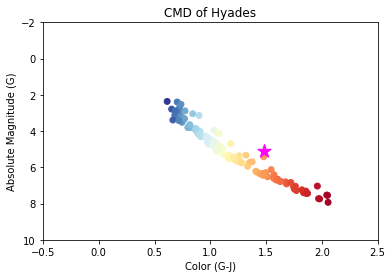

In [55]:
sunJ = 3.64
sunG = 5.12
sunn = sunG-sunJ
plt.clf()
cm = plt.cm.get_cmap("RdYlBu_r")
plt.scatter(color, absolutemag, c=color, s=35, cmap=cm, norm=mpl.LogNorm())
plt.scatter(sunn, sunG, c='magenta', s=200, marker='*')
plt.ylim([-2, 10])
plt.xlim([-0.5, 2.5])
plt.ylabel("Absolute Magnitude (G)")
plt.xlabel("Color (G-J)")
plt.title('CMD of Hyades')
plt.gca().invert_yaxis() 
plt.savefig("CMD Hyades")
plt.show()

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

In [38]:
plt.clf()
plt.hist(color, 10, color = "gray")
plt.title("Hyades Star Cluster")
plt.xlabel("Absolute Magnitude")
plt.ylabel("Color")
plt.savefig("Hyades Histogram")
plt.show()

ValueError: max must be larger than min in range parameter.

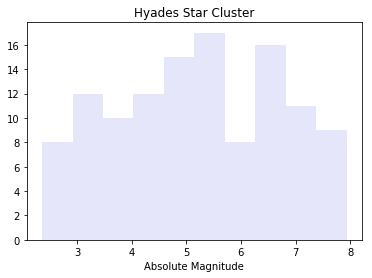

In [48]:
plt.clf()
plt.hist(absolutemag, 10, color = "lavender")
plt.title("Hyades Star Cluster")
plt.xlabel("Absolute Magnitude")
plt.ylabel("")
plt.savefig("Hyades Histogram")
plt.show()